# Automating Credit Card Approvals
> Dataset : http://archive.ics.uci.edu/ml/datasets/credit+approval

> Automating the approval process of Credit Cards based on the behavior from past data.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read & Explore Data

In [2]:
data=pd.read_csv('./datasets/crx.data',header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
data.shape

(690, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


###### <font color=green> __Observation:__ </font> Column '1' & '13' has numbers, but are classified as 'object'
* We will convert column '1' to numeric. By doing so, we will also try capturing the non-numeric values which led to classify the column as 'object'

In [6]:
data['1_int']=data[1].copy() #Creating a duplicate column

In [7]:
data[1]=pd.to_numeric(data[1], errors='coerce')
missing_value = list(data[data[1].isna()]['1_int'].unique())
missing_value # list of non-numeric values

['?']

In [8]:
data.drop(columns = '1_int',inplace=True) #dropping duplicate column

> ##### Same steps to column '13'

In [9]:
data['13_int']=data[13].copy()

In [10]:
data[13]=pd.to_numeric(data[13], errors='coerce')
#data[1].isna().sum()
#print(data[data[1].isna()]['1_int'].unique())
missing_value2 = data[data[13].isna()]['13_int'].unique()
missing_value2

array(['?'], dtype=object)

##### <font color=green> __Observation:__ </font> We find that '?' indicates missing values in columns '1' & '13'

In [11]:
data.drop(columns = '13_int',inplace=True) #dropping duplicate column

### A look at remaining 'object' columns

In [12]:
object_columns = [data.columns[i] for i in data.columns if data[i].dtype=='object']
object_columns
for i in object_columns:
    print(data[i].value_counts())

b    468
a    210
?     12
Name: 0, dtype: int64
u    519
y    163
?      6
l      2
Name: 3, dtype: int64
g     519
p     163
?       6
gg      2
Name: 4, dtype: int64
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: 5, dtype: int64
v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: 6, dtype: int64
t    361
f    329
Name: 8, dtype: int64
f    395
t    295
Name: 9, dtype: int64
f    374
t    316
Name: 11, dtype: int64
g    625
s     57
p      8
Name: 12, dtype: int64
-    383
+    307
Name: 15, dtype: int64


##### <font color=green> __Observation:__ </font> In all 'object' columns, it's the '?' which represents missing values

In [13]:
#LISTING COLUMN VALUES WITH '?'
object_columns = [data.columns[i] for i in data.columns if data[i].dtype=='object']
object_columns
for i in object_columns:
    print(data[i].value_counts()[data[i].value_counts().index=='?'])

?    12
Name: 0, dtype: int64
?    6
Name: 3, dtype: int64
?    6
Name: 4, dtype: int64
?    9
Name: 5, dtype: int64
?    9
Name: 6, dtype: int64
Series([], Name: 8, dtype: int64)
Series([], Name: 9, dtype: int64)
Series([], Name: 11, dtype: int64)
Series([], Name: 12, dtype: int64)
Series([], Name: 15, dtype: int64)


### Replacing '?' with NaN
For Python to identify missing values, it needs to be 'NaN'. So, We replace all '?' to 'NaN'

In [14]:
data.replace("?",np.nan,inplace=True)
data.isna().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [15]:
data.describe()

,1,2,7,10,13,14
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


### Handling missing values (NaNs)

* Numeric values : Based on the 5-number summary, the data is right skewed. So, filling missing values with 'median' is better than 'mean'. (Mean will be afected by the range, but not median)
* Categorical values : We'll fill missing values with the 'mode' - most frequently occuring value

In [16]:
#Filling NaNs in numeric fields with Median
data.fillna(data[[1,13]].median(),inplace=True)
data.isna().sum()

0     12
1      0
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
dtype: int64

In [17]:
#Filling NaNs in categorical fields with most frequent value
for col in list(data.select_dtypes(include=['object']).columns):
    if data[col].dtype=='object':
        data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))
    
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

##### <font color=green> __Observation:__ </font> No missing values

### Data Pre-processing <br>
__NOTE:__ Machine Learning Models run on numeric values

#### Handling Numeric values
* Highly correlated numeric values will reduce the prediction power, so we have to drop them.

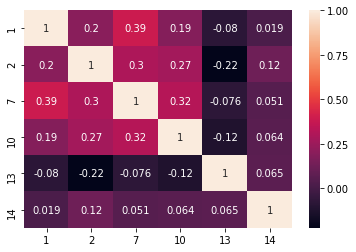

In [18]:
sns.heatmap(data.corr(),annot=True)

##### <font color=green> __Observation:__ </font> We don't have highly correlated numeric columns

#### Handling categorical Variables
- We see a number of categorical variables with multiple classes.
- There are different types of handling categorical variables each with it's own pros and cons.
- To get the best of each,
    1. For columns with just 2 categories, we use <font color=blue>LabelEncoder</font>:
    > LabelEncoder assigns numeric values to each class. With more than 2 classes, for example, the class with value '10' will be assigned 10x the importance when compared to the class with value '1'. This would induce bias in the model.
    2. For columns with 3 categories, we make use of <font color=blue>LabelBinarizer</font> to one-hot encode each class.
    >One-hot encoding eliminates the problem of 'LabelEncoder' since each class will have a separate column known as __dummy/indicator variables__ with '1's and '0's. But this method will lead to more dimensions (curse of dimensionality)
    3. For columns with more than 3 categories, <font color=blue>Category_Encoders</font> helps to deal mitigate the _curse of dimensionality_.
    > This codes each class into binary digits and separates each digit into columns.<br><br>
    > Example: Suppose there are 8 classes in a column, the values assigned would be 1 through 8.
    > Binary digit to represent 8 is 1000, so 4 columns will be created unlike one-hot encoding which will create 7 columns.

In [19]:
for col in data.columns:
    if data[col].dtype=='object':
        print(data[col].value_counts())

b    480
a    210
Name: 0, dtype: int64
u    525
y    163
l      2
Name: 3, dtype: int64
g     525
p     163
gg      2
Name: 4, dtype: int64
c     146
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: 5, dtype: int64
v     408
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: 6, dtype: int64
t    361
f    329
Name: 8, dtype: int64
f    395
t    295
Name: 9, dtype: int64
f    374
t    316
Name: 11, dtype: int64
g    625
s     57
p      8
Name: 12, dtype: int64
-    383
+    307
Name: 15, dtype: int64


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer


le=LabelEncoder()
for col in data.columns:
    # Compare if the dtype is object
    if data[col].dtype=='object' and (data[col].value_counts().count()<3):
    # Use LabelEncoder to do the numeric transformation
        data[col]=le.fit_transform(data[col])

lb=LabelBinarizer()
for col in data.columns:
    # Compare if the dtype is object
    if data[col].dtype=='object' and (data[col].value_counts().count()<4):
        data[col] = lb.fit_transform(data[col])


In [21]:
#Category_Encoders
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=[col for col in data.columns if (data[col].dtype=='object')])
data_binary = encoder.fit_transform(data)

In [22]:
data_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 24 columns):
0      690 non-null int32
1      690 non-null float64
2      690 non-null float64
3      690 non-null int32
4      690 non-null int32
5_0    690 non-null int64
5_1    690 non-null int64
5_2    690 non-null int64
5_3    690 non-null int64
5_4    690 non-null int64
6_0    690 non-null int64
6_1    690 non-null int64
6_2    690 non-null int64
6_3    690 non-null int64
6_4    690 non-null int64
7      690 non-null float64
8      690 non-null int32
9      690 non-null int32
10     690 non-null int64
11     690 non-null int32
12     690 non-null int32
13     690 non-null float64
14     690 non-null int64
15     690 non-null int32
dtypes: float64(4), int32(8), int64(12)
memory usage: 107.9 KB


### Scaling
In simple terms, to prevent the model to assign higher importance to large numeric values _(such as salary over age)_ we transform all columns into the range of "0 to 1".

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [24]:
#COVERTING PANDAS DATAFRAME INTO NUMPY ARRAY
data_binary_array = data_binary.values

#SPLITTING 'Predictors' AND 'The Predicted'
X,y = data_binary_array[:,0:-1] , data_binary_array[:,-1]

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

In [25]:
rescaledX[0] #First row of numpy array

array([1.        , 0.25684211, 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.04385965, 1.        , 1.        , 0.01492537, 0.        ,
       1.        , 0.101     , 0.        ])

In [26]:
#SPLIT DATASET INTO TRAIN AND TEST
from sklearn.model_selection import train_test_split

X_train, rescaledX_test, y_train, y_test= train_test_split(rescaledX,
                                y,
                                test_size=.25,
                                random_state=0)

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(rescaledX_test)
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))
confusion_matrix(y_test,y_pred)

Accuracy of logistic regression classifier:  0.8670520231213873


array([[70,  9],
       [14, 80]], dtype=int64)

### Grid Search CV - Decision Tree

In [29]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
clf = dtc.fit(rescaledX,y)

In [30]:
dtc_param_grid={'min_samples_split' : range(2,10,1),'max_depth': range(1,10,1)}

In [31]:
from sklearn.model_selection import GridSearchCV

dtc_grid_model = GridSearchCV(estimator=dtc, param_grid=dtc_param_grid, cv=5)
dtc_grid_model_result = dtc_grid_model.fit(rescaledX, y)
best_score, best_params = dtc_grid_model_result.best_score_,dtc_grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.855072 using {'max_depth': 1, 'min_samples_split': 2}


C:\Users\mahee\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


To __Conclude__, we explored data cleaning and built 2 models to predict credit card approvals with an accuracy close to __86%__